In [3]:
# import packages
import os
import re
import numpy as np
from numpy.fft import fft, fftshift
from numpy import pi, inf 
# import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive
%run utils/nmr_helper_functions
%run utils/nmr_objects
%run utils/config
# from utils.helper_functions import *
# from utils.nmr_objects import NMRObject

In [27]:
file_path = DATA_DIRECTORY + '20200914-Rat47/20200914_154834_31P_test_rat_47_1_1/' + '9'
c = read_complex_fid(file_path, drop_points=POINTS_TO_REMOVE)

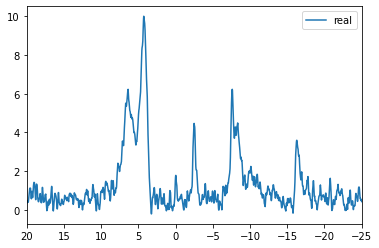

In [50]:
# define an object
a = NMRObject(c)
a.sw = SW_HZ
a.line_broad(60)
a.phase(-13*pi/30, -0.0006)
a.find_ppm(CENTER_FREQ_MHZ, CENTER_PPM)
a.remove_baseline(2)
a.normalize_spectrum()
a.show_real_spectrum()

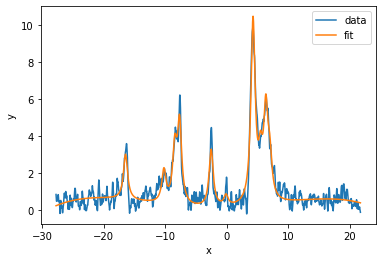

In [51]:
popt, pcov = curve_fit(nmr_peak_fit, a.ppm, a.spectrum, bounds=BOUNDS)

plt.plot(a.ppm, a.spectrum, '-', label='data')
plt.plot(a.ppm, nmr_peak_fit(a.ppm, *popt), label='fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [49]:
popt

array([ 6.47170899e-01,  6.16678980e-01,  9.49282356e-01,  1.47647227e+00,
        1.13532618e+00,  3.37717208e-01,  3.05946938e+00,  5.88145190e-01,
        6.87458412e-01,  1.47878163e+00, -1.64235004e+01, -1.01849875e+01,
       -8.44072815e+00, -7.63444710e+00, -2.51760898e+00, -8.61815588e-02,
        4.27919671e+00,  5.50000000e+00,  7.00000000e+00,  6.36228025e+00,
        3.90847621e-01,  1.00000000e+00,  1.00000000e-02,  3.83521499e-03,
       -6.23989453e-05, -7.25417822e-06])

In [31]:
# phase spectrum, used for itneractive phasing
def phase_spectrum(ph0, ph1):
    ''' function that's passed on to the interactive object for phasing.

    Args:
        spec_obj::[NMRObject]
            spectrum object
        ph0::[float]
            zero-order phase
        ph1::[float]
            first order phase
    '''
    s.phase(ph0*pi, ph1/1000)
    s.show_real_spectrum()
    print(f'use ph0:{ph0}*pi, and ph1:{ph1/1000}')


s = NMRObject(read_complex_fid(file_path))
s.sw = SW_HZ
s.line_broad(30)
interactive_plot = interactive(phase_spectrum,
                            ph0=(-0.5, 0.5, 0.01),
                            ph1=(-2, 2, 0.02))

output = interactive_plot.children[-1]
print(output)
output.layout.height = '350px'
interactive_plot


Output()


interactive(children=(FloatSlider(value=0.0, description='ph0', max=0.5, min=-0.5, step=0.01), FloatSlider(val…

In [172]:
# fid object (done)
    # fid
    # spectrum
    # phase
    # line broadening

# read bruker file (done)

# identify bruker experiments
 
# interactive phasing (done)

# baseline removal (done)

# spectral fitting (done)

# quantification of metabolites

# store parameters in a pandas table, and in a csv file.

In [ ]:
# fit function
# s1*r / ((x-f1)^2+r^2) + s2*r / ((x-f2)^2+r^2) + s3*r / ((x-f3)
#                     ^2+r^2) + s4*r / ((x-f4)^2+r^2) + s5*r / ((x-f5)^2+
#                     r^2) + s6*r / ((x-f6)^2+r^2) + s7*r / ((x-f7)^2+r^2)
#                      + s8*r / ((x-f8)^2+r^2) + s9*r / ((x-f9)^2+r^2) + 
#                     s10*r / ((x-f10)^2+r^2) + p0 + p1*x + p2*x^2 + p3*x^3 
#                     + p4*x^4